# People

## Most frequently occurring person names 

This page provides information about person names, i.e. authors and editors. 

In [2]:
# === Imports === 

import re 
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import join
from os.path import realpath, dirname
import os
from lxml import etree
from io import StringIO, BytesIO
from collections import Counter
import pandas as pd


# === Files and parameters === 

wdir = join("/", "media", "christof", "Data", "Github", "christofs", "BIB18")
bibdatafile = join(wdir, "data", "BIB18_Zotero-RDF.rdf") 
#bibdatafile = join(wdir, "data", "BIB18_Zotero-RDF_TEST.rdf") 


namespaces = {
    "foaf" : "http://xmlns.com/foaf/0.1/",
    "bib" : "http://purl.org/net/biblio#",
    "dc" : "http://purl.org/dc/elements/1.1/",
    "z" : "http://www.zotero.org/namespaces/export#",
    "rdf" : "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    }


def read_json(bibdatafile): 
    bibdata = etree.parse(bibdatafile)
    return bibdata

bibdata = read_json(bibdatafile)

In [7]:
def get_personnames(bibdata): 

    # Find all the instances of persons
    personnames = []
    xpath = "//foaf:Person"
    persons = bibdata.xpath(xpath, namespaces=namespaces)
    print("There are " + str(len(persons)) + " instances of the Element 'person' in the dataset.")

    # Get the names (full name or first name, last name) from each person
    for item in persons: 
        if len(item) == 1: 
            personname = item[0].text
            personnames.append(personname)
        elif len(item) == 2: 
            personname = item[0].text + ", " + item[1].text 
            personnames.append(personname)    
    print("There are " + str(len(Counter(personnames))) + " different person names in the dataset.")
    return personnames

global personnames
personnames  = get_personnames(bibdata)


There are 94321 instances of the Element 'person' in the dataset.
There are 31026 different person names in the dataset.


## Visualization of the most frequent person names 

These persons could be authors or editors of publications. 

There are 31026 different person names in the dataset.


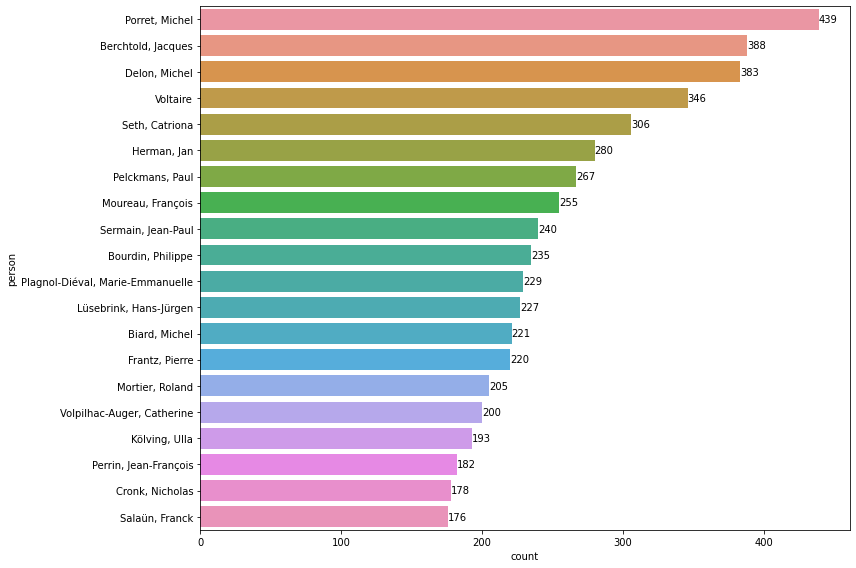

In [4]:
def most_frequent_persons(personnames):
    # Count the occurrences, find the 10 most frequently mentioned publishers
    personnames_counts = Counter(personnames)
    personnames_counts = dict(
        sorted(personnames_counts.items(), 
        key = lambda item: item[1], reverse=True)[:20]
        )
    
    columns = ["count"]
    personnames_counts = pd.DataFrame.from_dict(
        personnames_counts, 
        orient="index", 
        columns=["count"]).reset_index().rename({"index" : "person"}, 
        axis=1
        )
    
    #print(personnames_counts)
    return personnames_counts


def visualize_personnames_counts(personnames_counts): 
    #print(publishernames_counts)
    plt.figure(figsize=(12,8))
    pal = sns.color_palette("colorblind", len(personnames_counts))
    fig = sns.barplot(
        data=personnames_counts, 
        y="person", 
        x="count", 
        orient='h' 
        )
    for i in fig.containers:
        fig.bar_label(i,)
    plt.tight_layout()
    plt.savefig(
        join(wdir, "figures", "personnames_counts.png"),
        dpi=300
        )


personnames_counts = most_frequent_persons(personnames)
visualize_personnames_counts(personnames_counts)
